# Adnan Ahmed's Notebook
## Reasearch Question: 
## Which areas are the most targeted?

In [1]:
#Importing Pandas
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
#To read CSV files as pd
df = pd.read_csv("../data/raw/crimedata_csv_all_years.csv")

#display
display(df)
df.head()
df.columns

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Theft from Vehicle,2006,3,4,20,30,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
1,Theft from Vehicle,2006,3,5,11,30,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
2,Theft from Vehicle,2006,4,16,0,1,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
3,Theft from Vehicle,2006,6,11,17,45,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
4,Theft from Vehicle,2006,8,5,20,0,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
...,...,...,...,...,...,...,...,...,...,...
793911,Theft from Vehicle,2005,3,9,21,30,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
793912,Theft from Vehicle,2005,6,5,23,0,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
793913,Theft from Vehicle,2005,8,1,22,0,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
793914,Theft from Vehicle,2005,12,14,0,0,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06


Index(['TYPE', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'HUNDRED_BLOCK',
       'NEIGHBOURHOOD', 'X', 'Y'],
      dtype='object')

In [3]:
df.nunique(axis=0)

TYPE                 11
YEAR                 19
MONTH                12
DAY                  31
HOUR                 24
MINUTE               60
HUNDRED_BLOCK     22939
NEIGHBOURHOOD        24
X                139461
Y                139296
dtype: int64

In [4]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,YEAR,MONTH,DAY,HOUR,MINUTE,X,Y
count,793916.000000,793916.000000,793916.000000,793916.000000,793916.000000,793843.000000,793843.000000
mean,2011.189500,6.494100,15.394095,12.397745,15.711429,450191.835386,4991158.124680
std,5.528776,3.417018,8.757672,7.445387,18.302254,137534.630035,1524555.068773
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,4.000000,8.000000,7.000000,0.000000,490179.610700,5454241.958800
50%,2011.000000,7.000000,15.000000,14.000000,5.000000,491556.822500,5457160.397300
75%,2016.000000,9.000000,23.000000,19.000000,30.000000,493389.994600,5458717.612400
max,2021.000000,12.000000,31.000000,23.000000,59.000000,511303.000000,5512579.000000


In [5]:
#To find any unique values in the neighbourhood column
df.NEIGHBOURHOOD.unique()

array(['Central Business District', 'West End', 'Shaughnessy',
       'Renfrew-Collingwood', 'West Point Grey', 'Dunbar-Southlands',
       'Killarney', 'Victoria-Fraserview', 'Kensington-Cedar Cottage',
       'Kerrisdale', 'Kitsilano', 'Grandview-Woodland',
       'Hastings-Sunrise', 'Strathcona', 'Fairview', 'Riley Park',
       'Mount Pleasant', 'Sunset', 'Oakridge', 'Marpole', 'Arbutus Ridge',
       'South Cambie', 'Musqueam', 'Stanley Park', nan], dtype=object)

In [6]:
# set identifier "TYPE" as string
df['TYPE'] = df['TYPE'].astype('str')
# set categorical data
df['NEIGHBOURHOOD'] = df['NEIGHBOURHOOD'].astype('category')


In [22]:
# Generate preview of entries with null values
if df.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df[df.isnull().any(axis=1)].head(3))
    plt.show()


Preview of data with null values:
xxxxxxxxxxxxx
                                                    TYPE  YEAR  MONTH  DAY  \
55499                                   Theft of Vehicle  2005      2   12   
98311  Vehicle Collision or Pedestrian Struck (with F...  2017     12   19   
98312  Vehicle Collision or Pedestrian Struck (with F...  2005      6    7   

       HOUR  MINUTE             HUNDRED_BLOCK        NEIGHBOURHOOD  \
55499    22      30                       NaN  Victoria-Fraserview   
98311     2       4  14XX BURRARD STREET BRDG                  NaN   
98312     0      47   14XX CAMBIE STREET BRDG                  NaN   

                 X             Y  
55499  495178.0000  5.452000e+06  
98311  490027.3016  5.458077e+06  
98312  491642.1726  5.457693e+06  


In [13]:
# Generates the count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

# Gets rid of any duplicates after confirming if they are actually duplicates
df.drop_duplicates(inplace=True)

No duplicated entries found


In [19]:
def categorical_eda(df):
    """Given dataframe, generate EDA of categorical data"""
    print("To check: Unique count of non-numeric data")
    print(df.select_dtypes(include=['category']).nunique())
    top5(df)

# Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df)
        fig.set_xticklabels(rotation=90)
        plt.show()

<AxesSubplot:>

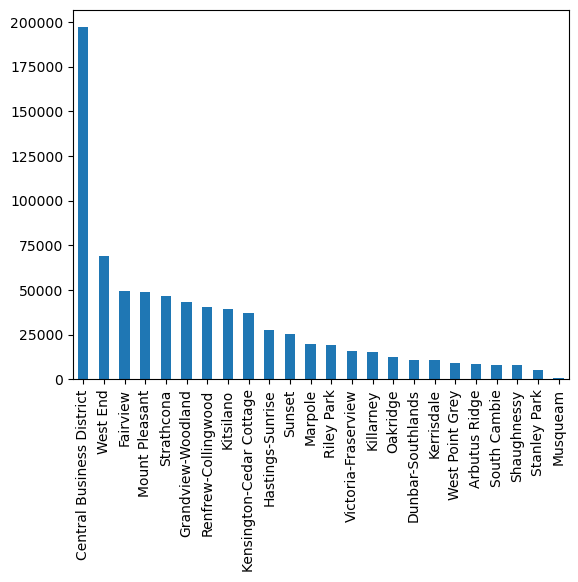

In [21]:
# Provides the visual representation of the frequency of crimes in each neighbourhood
df['NEIGHBOURHOOD'].value_counts().plot(kind ='bar')

Through the bar graph, we can assume that the Central business district has the highest crime rate accumulation throughout the years. 